<a href="https://colab.research.google.com/github/AshSama12/Energy-Efficient/blob/master/DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import  the zipfile
import zipfile
zip_file_path ='/content/drive/MyDrive/data mining/energy+efficiency.zip'

In [ ]:
#unzip the file
with zipfile.ZipFile(zip_file_path,'r') as zip_ref:
  zip_ref.extractall('/content/energy_efficiency')

In [ ]:
#load the dataset
import pandas as pd
excel_file_path ='/content/energy_efficiency/ENB2012_data.xlsx'

In [ ]:
# Load the dataset into a DataFrame
data = pd.read_excel(excel_file_path)
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
# Step 4: Data Visualization, Distribution, and Correlation Analysis
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set up plot style
plt.style.use('seaborn-darkgrid')

<ipython-input-7-756a3651721b>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


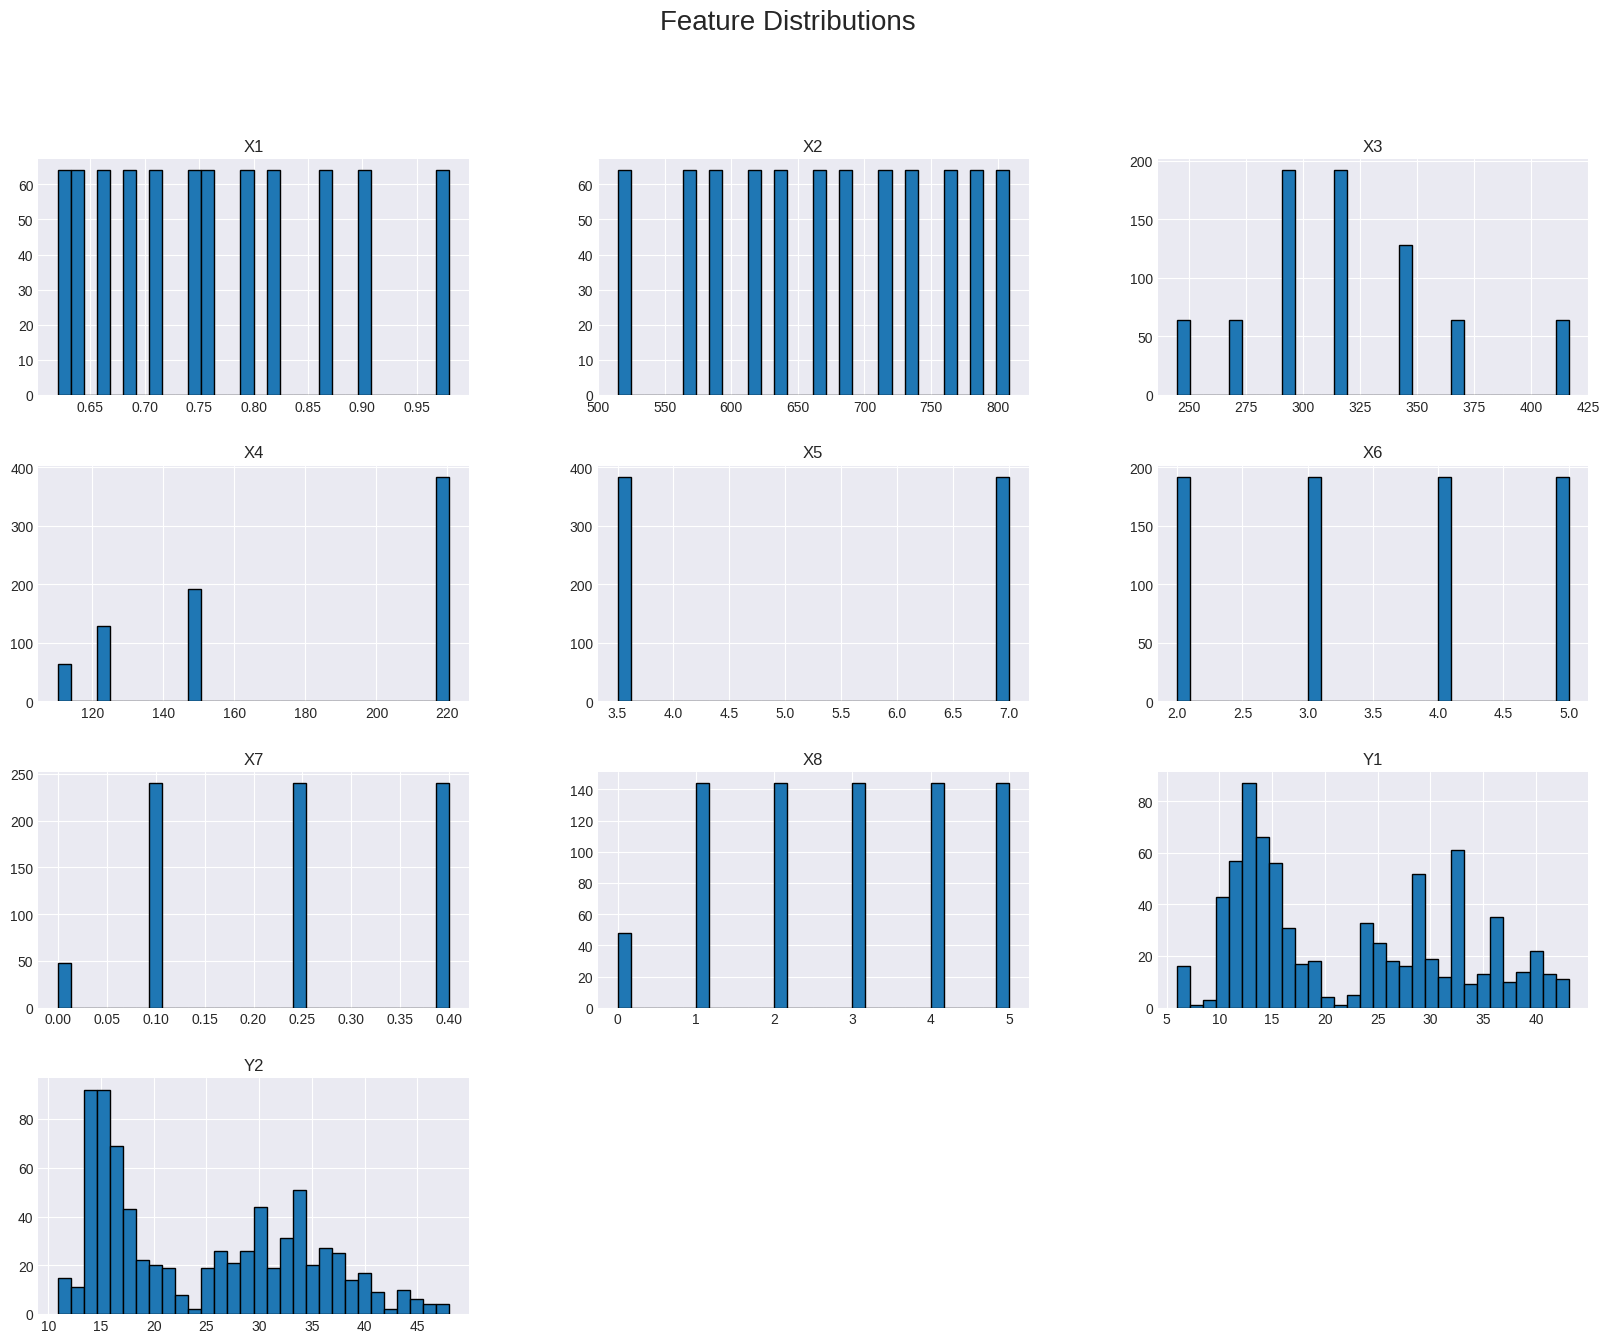

In [ ]:
# 1. Distribution analysis (Histograms)
data.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=20)
plt.show()

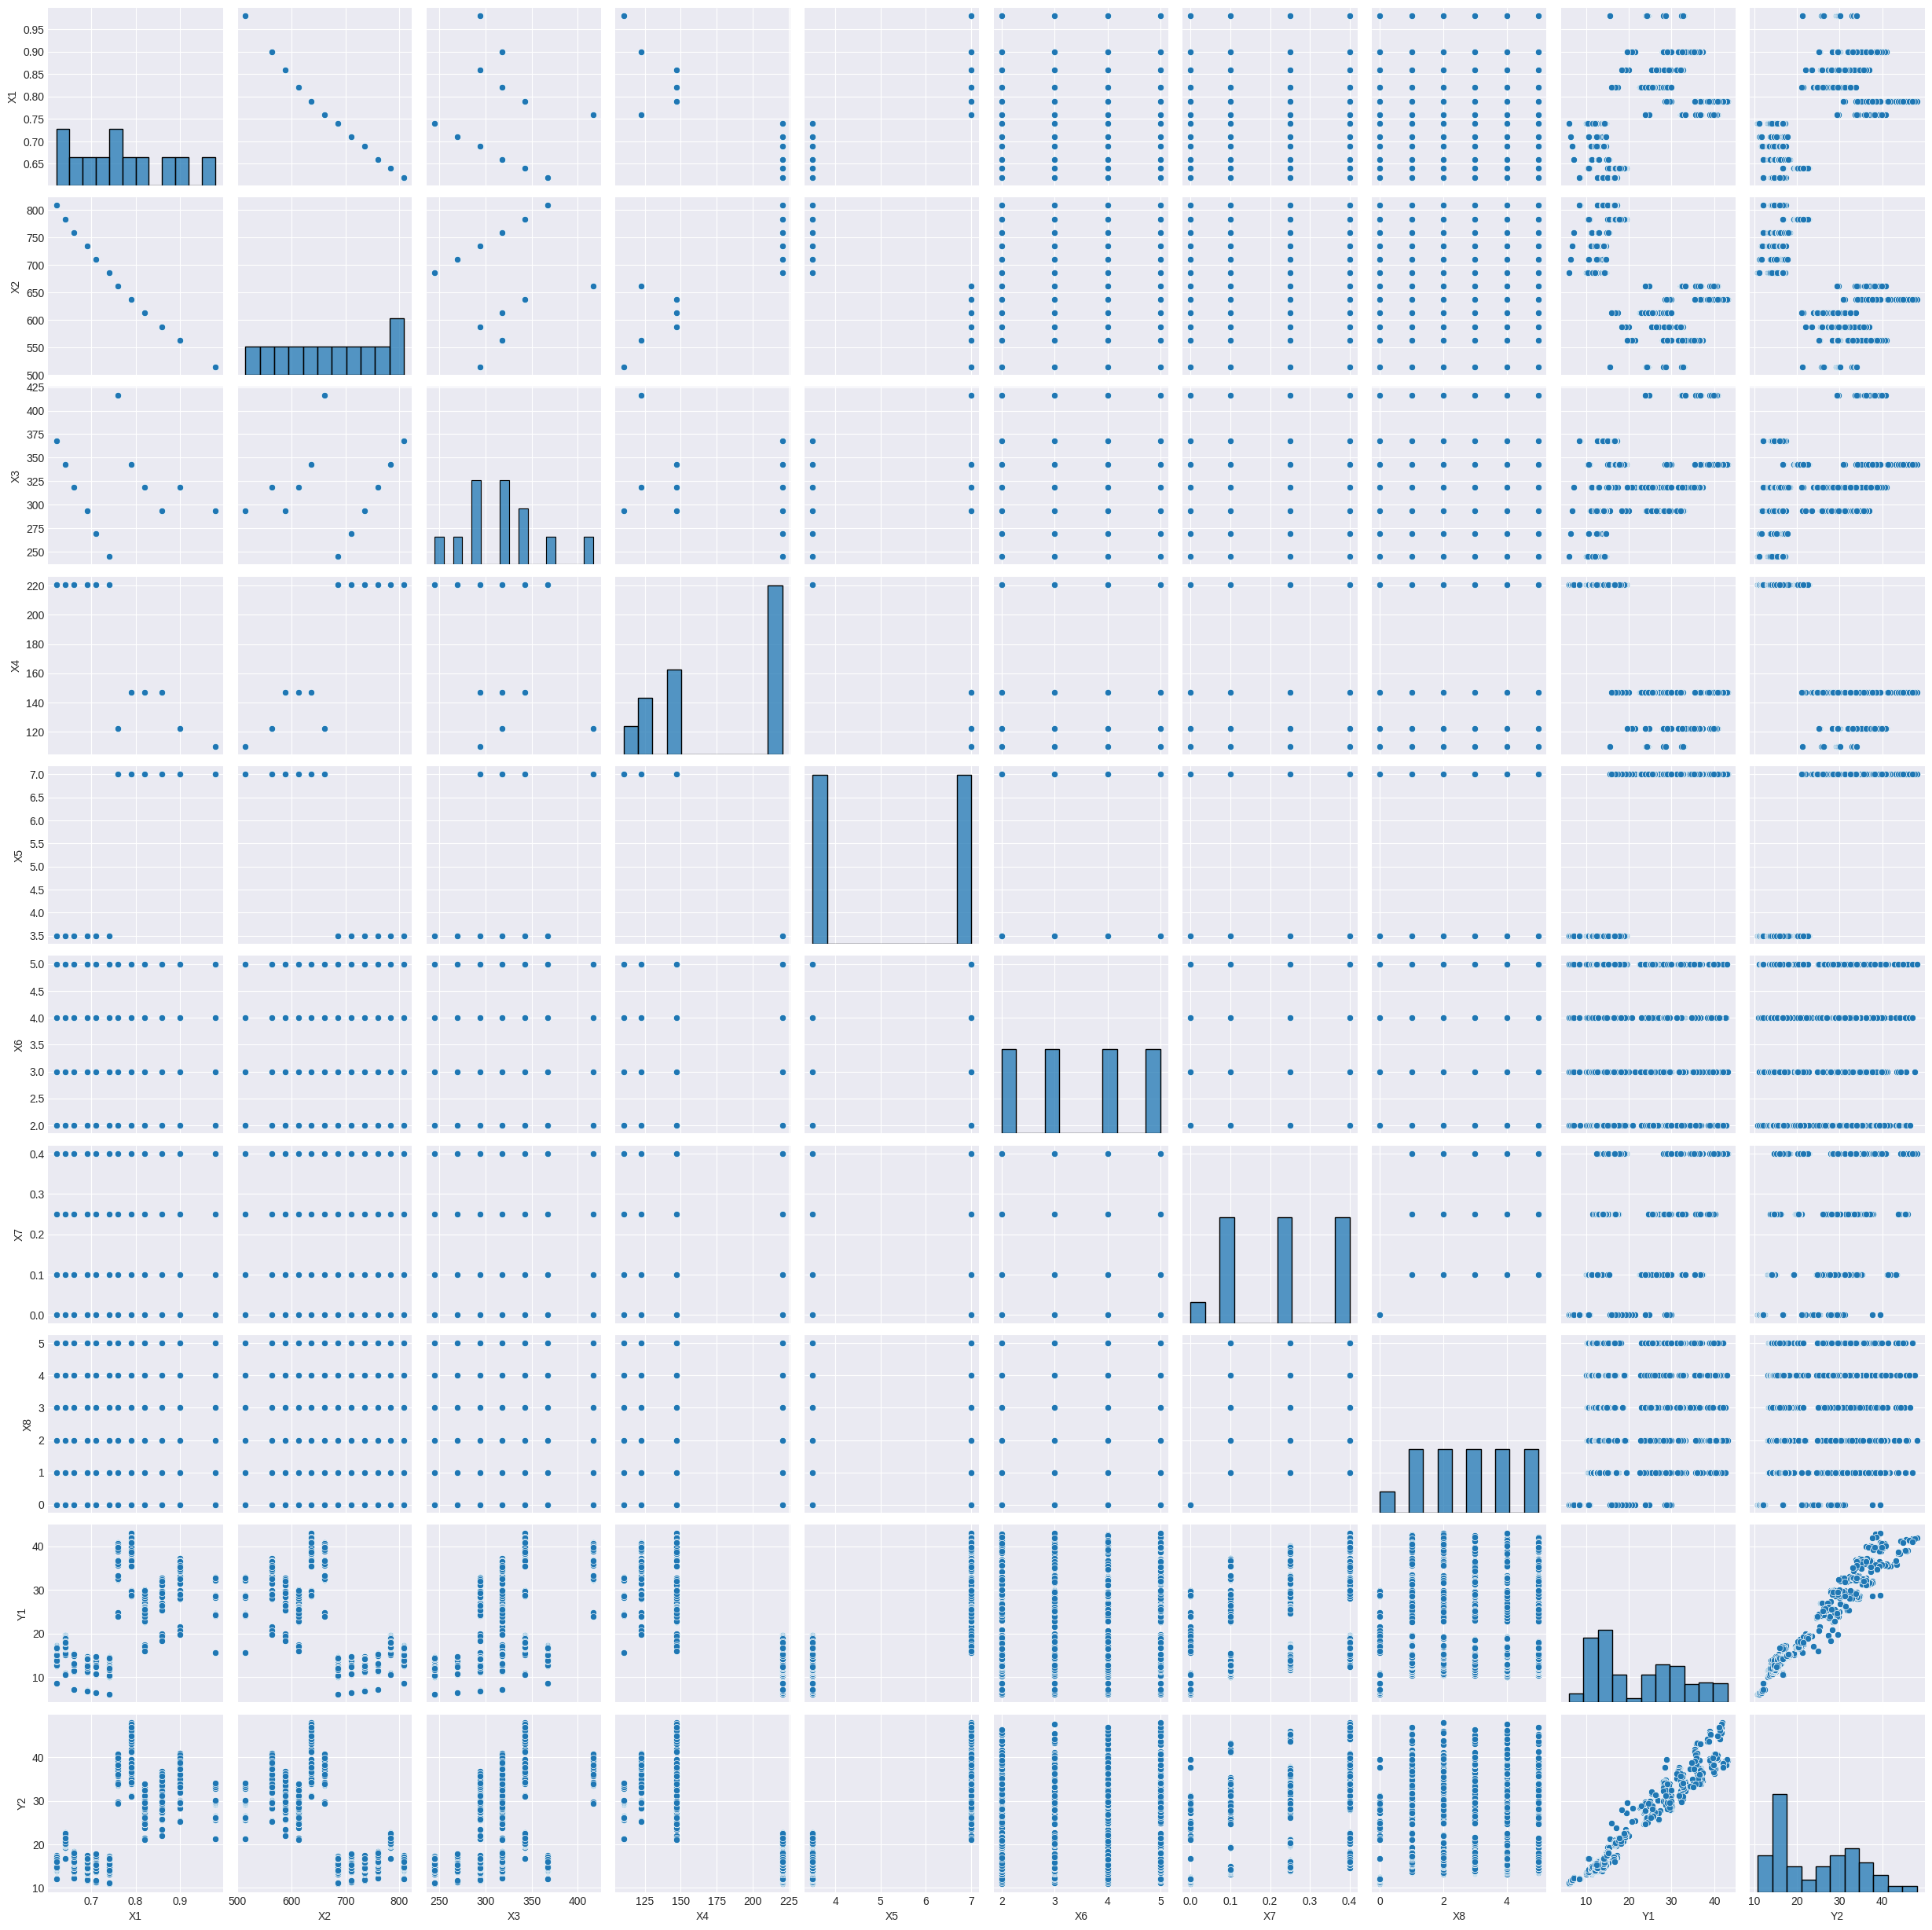

In [ ]:
# 2. Pairplot for visualizing relationships
sns.pairplot(data)
plt.show()

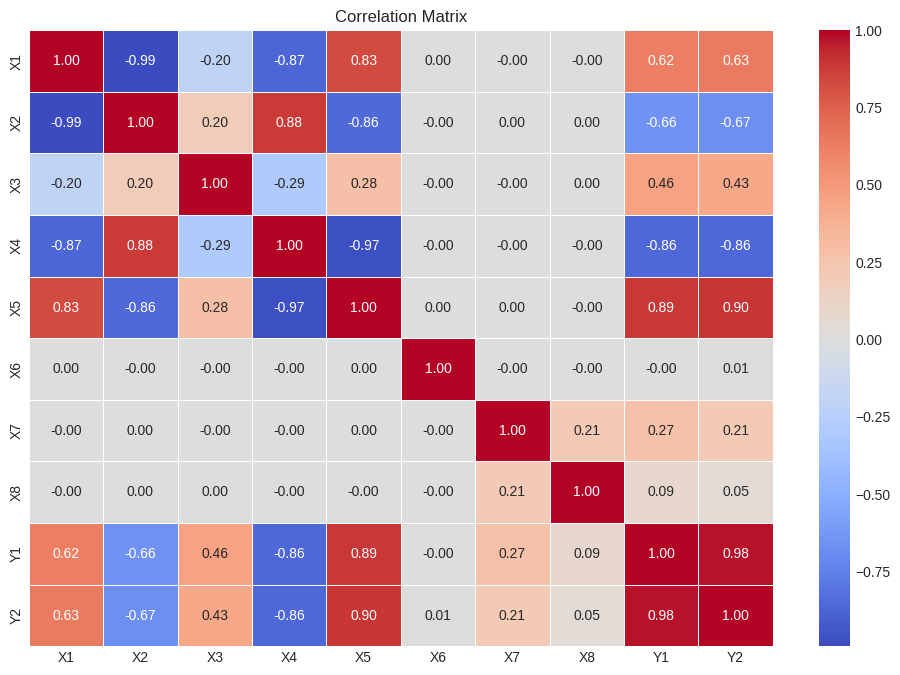

In [ ]:
# 3. Correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# 4. Summary Statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.000000   
25%      0.682500  606.375000  294.000000  140.875000    3.50000    2.750000   
50%      0.750000  673.750000  318.500000  183.750000    5.25000    3.500000   
75%      0.830000  741.125000  343.000000  220.500000    7.00000    4.250000   
max      0.980000  808.500000  416.500000  220.500000    7.00000    5.000000   

               X7         X8          Y1          Y2  
count  768.000000  768.00000  768.000000  768.000000  
mean     0.234375    2.81250   22.307195   24.587760  
std      0.133221    1.55096   10.090204    9.513306  
min      0.000000    0.00000    6.0100

In [ ]:
# 5. Skewness and Kurtosis
print("\nSkewness of each feature:")
print(data.skew())
print("\nKurtosis of each feature:")
print(data.kurtosis())


Skewness of each feature:
X1    0.495513
X2   -0.125131
X3    0.533417
X4   -0.162764
X5    0.000000
X6    0.000000
X7   -0.060254
X8   -0.088689
Y1    0.360446
Y2    0.395992
dtype: float64

Kurtosis of each feature:
X1   -0.706568
X2   -1.059454
X3    0.116593
X4   -1.776947
X5   -2.005229
X6   -1.361042
X7   -1.327629
X8   -1.148709
Y1   -1.245569
Y2   -1.147190
dtype: float64


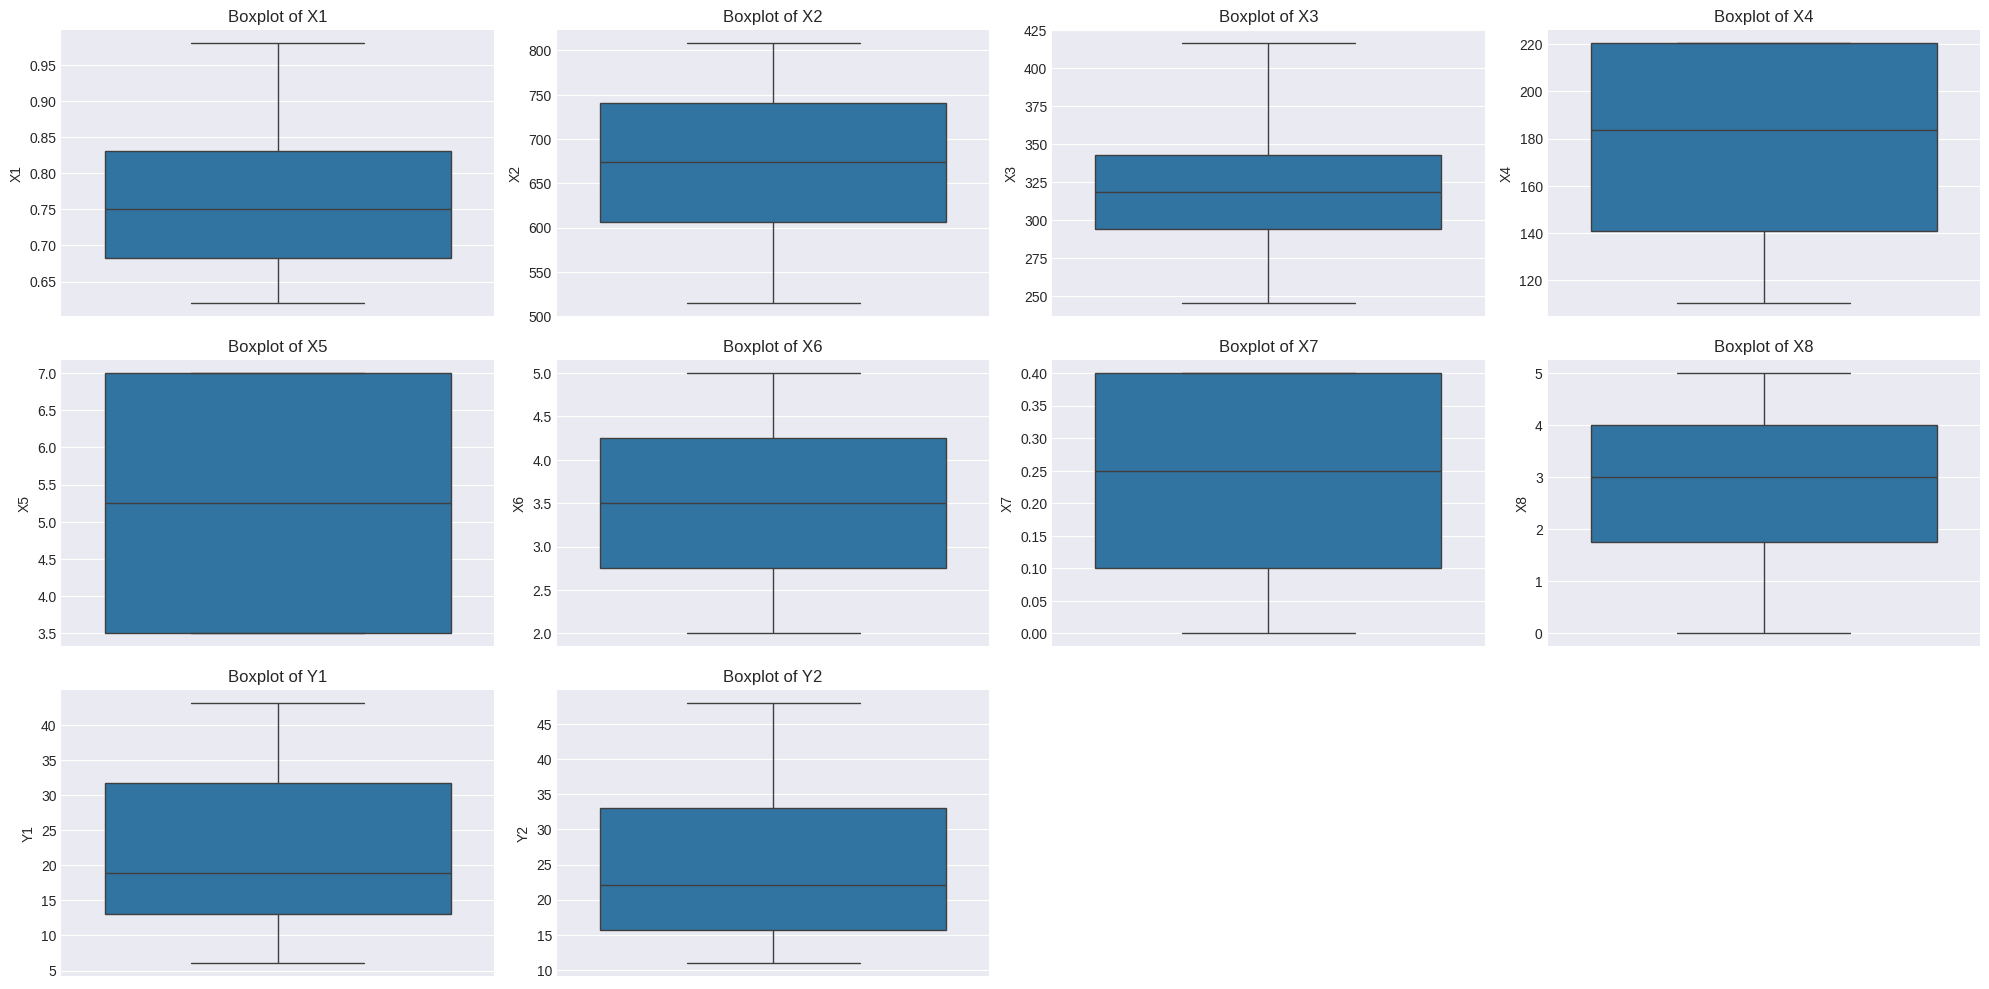

In [ ]:
# 6. Boxplots for Outlier Detection
plt.figure(figsize=(20, 10))
for i, col in enumerate(data.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

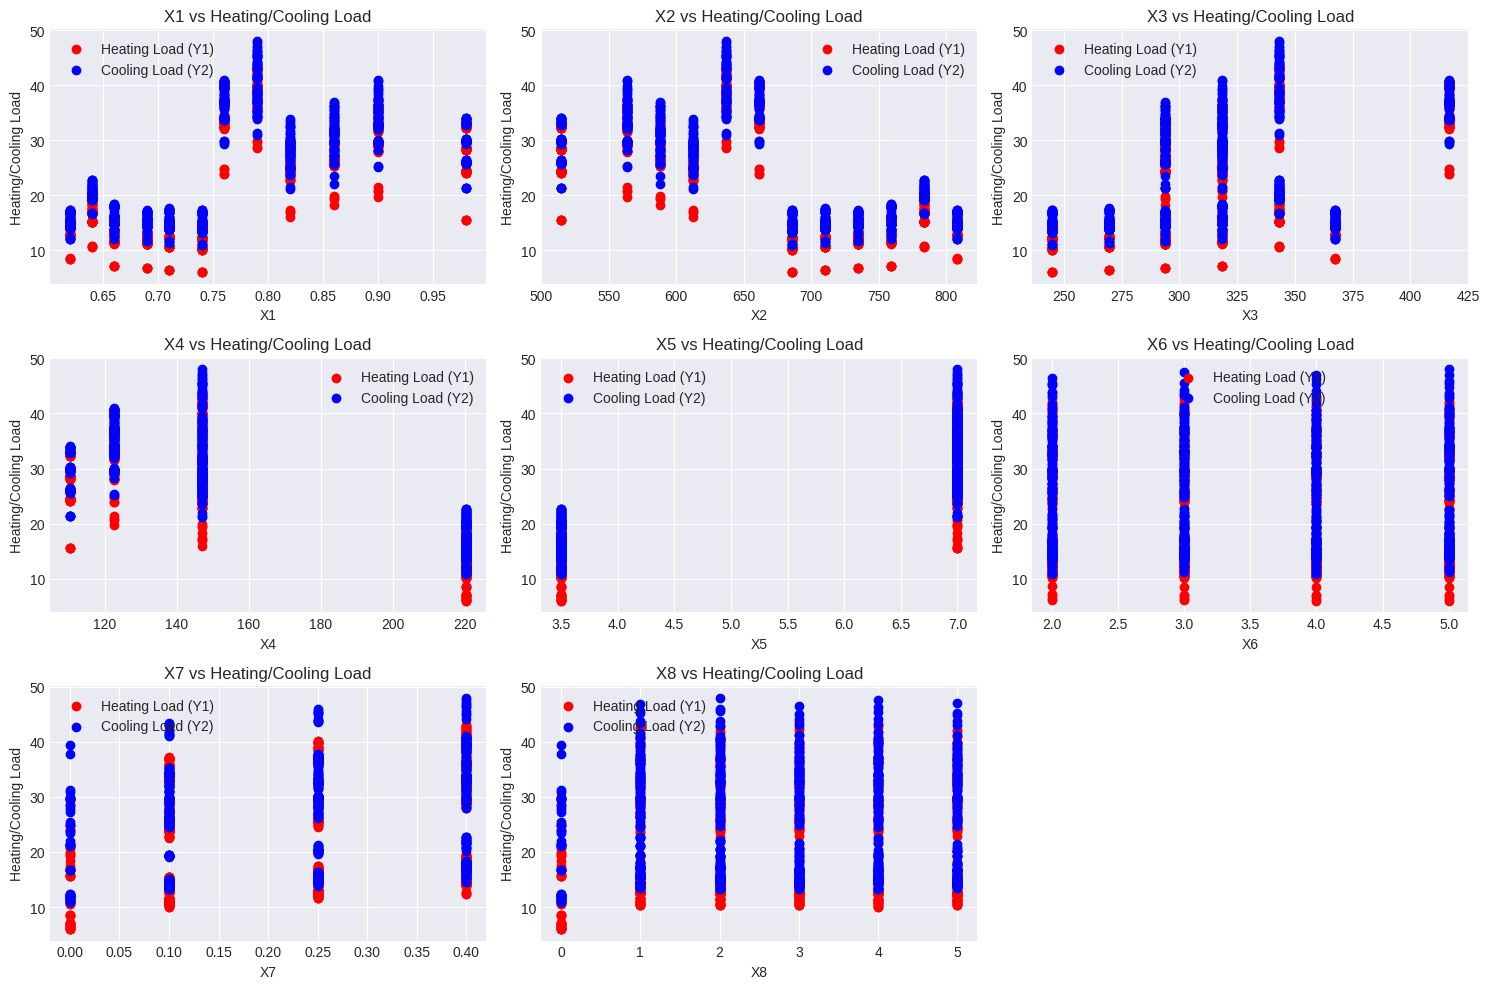

In [ ]:
# 7. Feature-Target Relationships (Scatter plots)
plt.figure(figsize=(15, 10))
for col in data.columns[:-2]:  # Exclude the target variables
    plt.subplot(3, 3, list(data.columns).index(col) + 1)
    plt.scatter(data[col], data['Y1'], color='r')
    plt.scatter(data[col], data['Y2'], color='b')
    plt.xlabel(col)
    plt.ylabel('Heating/Cooling Load')
    plt.legend(['Heating Load (Y1)', 'Cooling Load (Y2)'])
    plt.title(f'{col} vs Heating/Cooling Load')
plt.tight_layout()
plt.show()

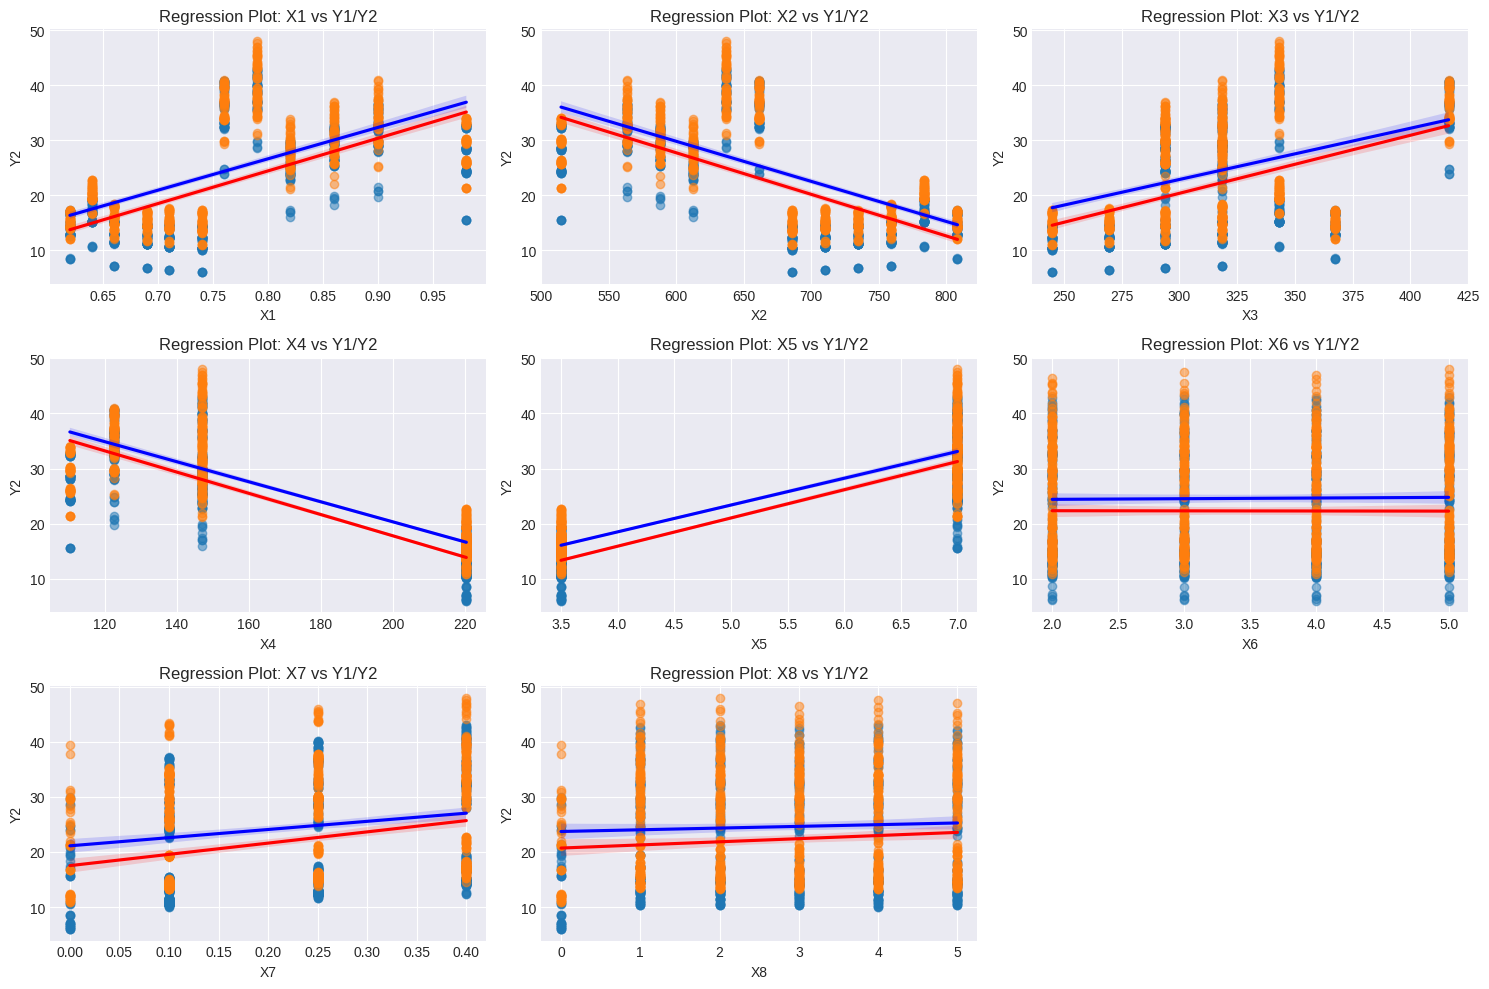

In [ ]:
# 8. Regression Plots for Feature-Target Relationships
plt.figure(figsize=(15, 10))
for col in data.columns[:-2]:  # Exclude the target variables Y1 and Y2
    plt.subplot(3, 3, list(data.columns).index(col) + 1)
    sns.regplot(x=data[col], y=data['Y1'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    sns.regplot(x=data[col], y=data['Y2'], scatter_kws={'alpha':0.5}, line_kws={'color':'blue'})
    plt.title(f'Regression Plot: {col} vs Y1/Y2')
plt.tight_layout()
plt.show()

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


In [ ]:
data.fillna(data.mean(), inplace=True)

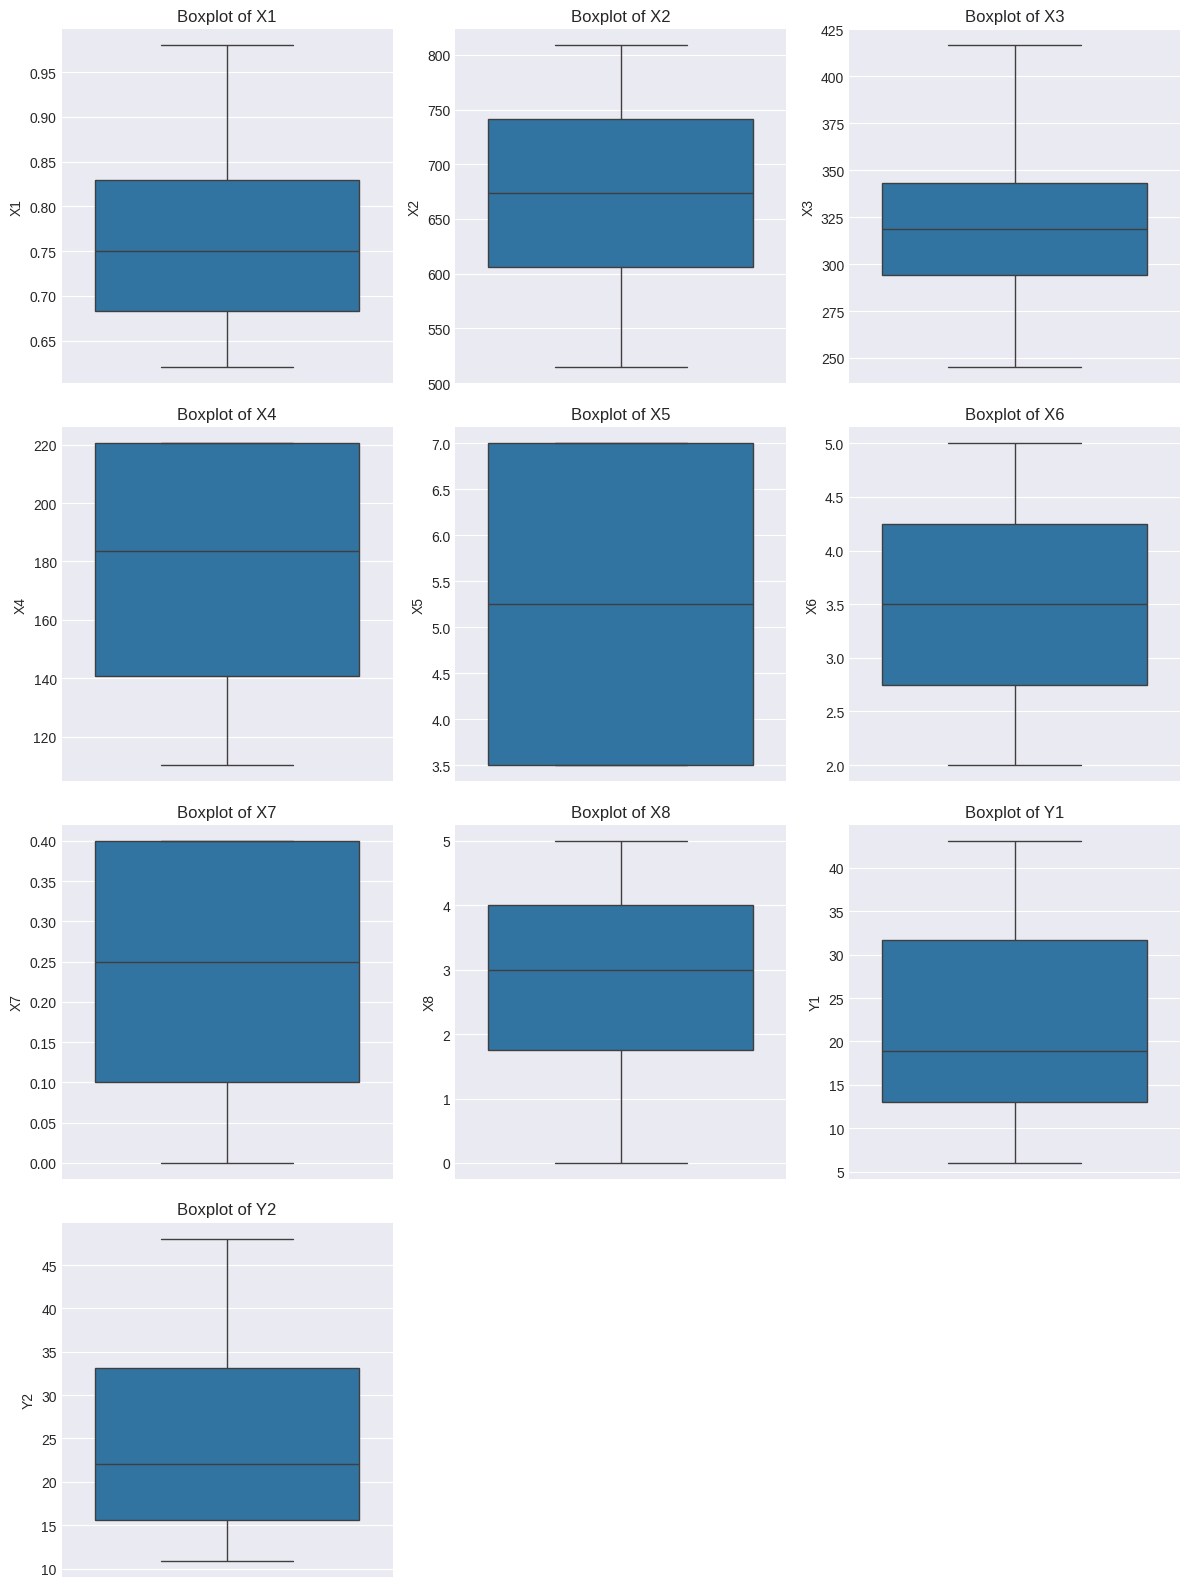

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the number of columns for grid layout
num_cols = 3
num_features = len(data.select_dtypes(include='number').columns)
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

# Create a grid of boxplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))
axes = axes.flatten()  # Flatten to easily index subplots

# Plot each numerical feature in its own boxplot
for i, col in enumerate(data.select_dtypes(include='number').columns):
    sns.boxplot(data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Remove any empty subplots if features don't fit perfectly into the grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling to all columns
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)
data_normalized = pd.DataFrame(data_normalized, columns=data.columns)


In [ ]:
data_encoded = pd.get_dummies(data, drop_first=True)

In [ ]:
print("Sample of preprocessed data:\n", data.head())
print("Summary statistics:\n", data.describe())

Sample of preprocessed data:
      X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
Summary statistics:
                X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.000000   
25%      0.682500  606.375000  294.000000  140.875000    3.50000    2.750000   
50%      0.750000  673.750000  318.500000  183.750000    5.25000    3.500000   
75%      0.830000

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling to all columns
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)
data_normalized = pd.DataFrame(data_normalized, columns=data.columns)


In [ ]:
# Check the columns in the dataframe
print(data.columns)


Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')


In [ ]:
# Rename columns to more descriptive names
data.columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height',
                'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load']


In [ ]:
# Encoding 'Orientation' and 'Glazing_Area_Distribution' as one-hot variables
data = pd.get_dummies(data, columns=['Orientation', 'Glazing_Area_Distribution'], drop_first=True)


In [ ]:
scaler = StandardScaler()
data[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Glazing_Area']] = \
    scaler.fit_transform(data[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Glazing_Area']])

In [ ]:
# Import the necessary function
from sklearn.model_selection import train_test_split

# Define features and target
X = data.drop(columns=['Heating_Load', 'Cooling_Load'])
y = data[['Heating_Load', 'Cooling_Load']]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training and testing data shapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Training and testing data shapes: (537, 14) (231, 14) (537, 2) (231, 2)


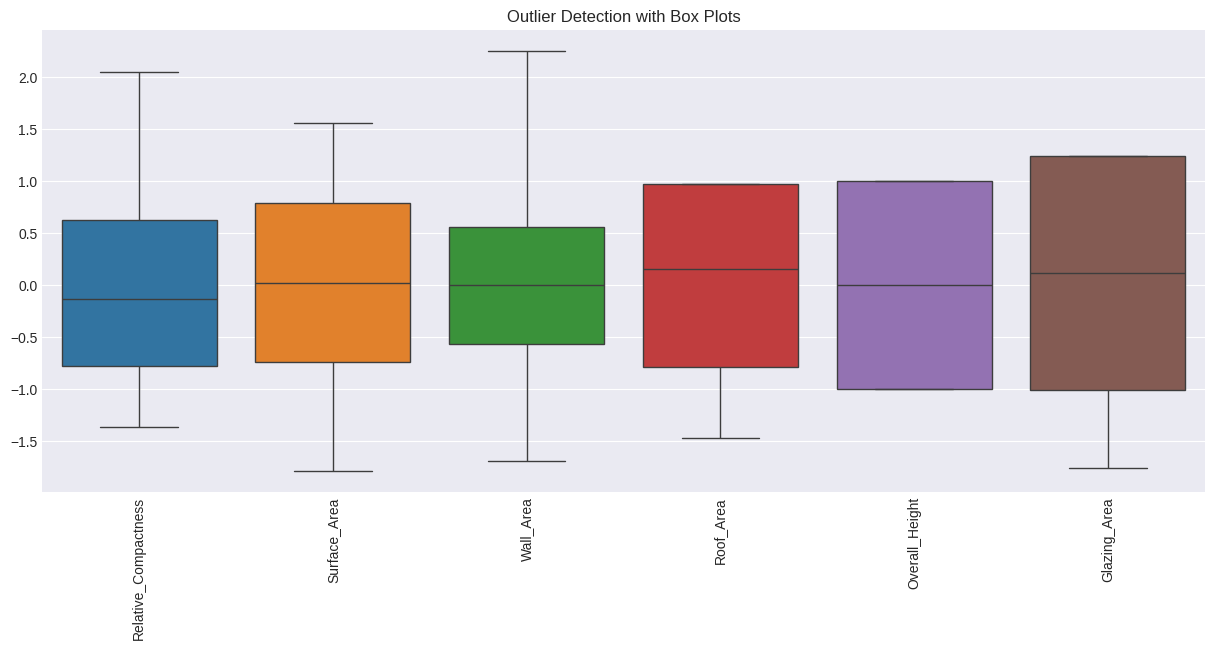

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=data[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Glazing_Area']])
plt.xticks(rotation=90)
plt.title('Outlier Detection with Box Plots')
plt.show()

In [ ]:
import numpy as np
# Detecting and optionally removing outliers with Z-scores
from scipy.stats import zscore

# Calculate z-scores
z_scores = np.abs(zscore(data[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Glazing_Area']]))
outliers = (z_scores > 3).any(axis=1)
print(f"Number of outliers detected: {outliers.sum()}")

# Remove outliers if needed
# data = data[~outliers]


Number of outliers detected: 0


In [ ]:
# Example: Interaction terms between Relative Compactness and Surface Area
data['Compactness_Surface_Interaction'] = data['Relative_Compactness'] * data['Surface_Area']

# Example: Polynomial features for Overall Height
data['Overall_Height_Squared'] = data['Overall_Height'] ** 2


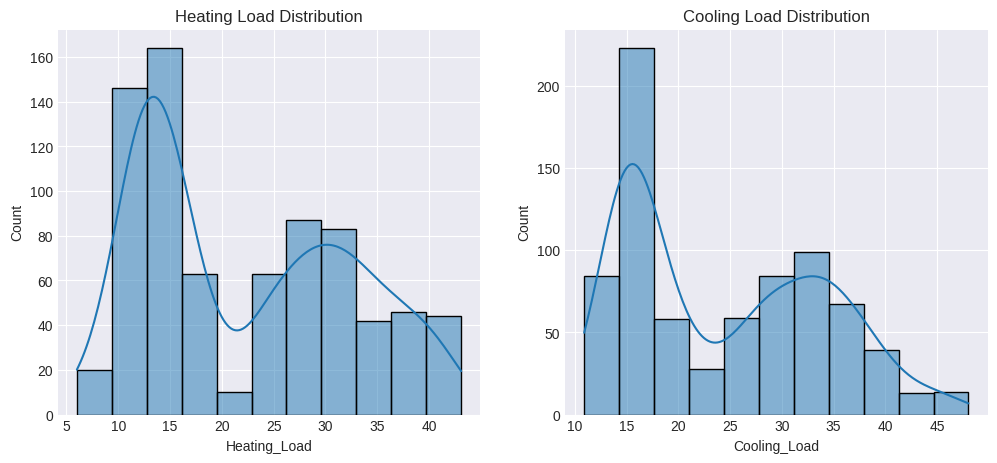

In [ ]:
# Check distribution of target variables
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['Heating_Load'], kde=True)
plt.title('Heating Load Distribution')
plt.subplot(1, 2, 2)
sns.histplot(data['Cooling_Load'], kde=True)
plt.title('Cooling Load Distribution')
plt.show()

# If skewed, apply log transformation (uncomment to use)
# data['Heating_Load'] = np.log1p(data['Heating_Load'])
# data['Cooling_Load'] = np.log1p(data['Cooling_Load'])


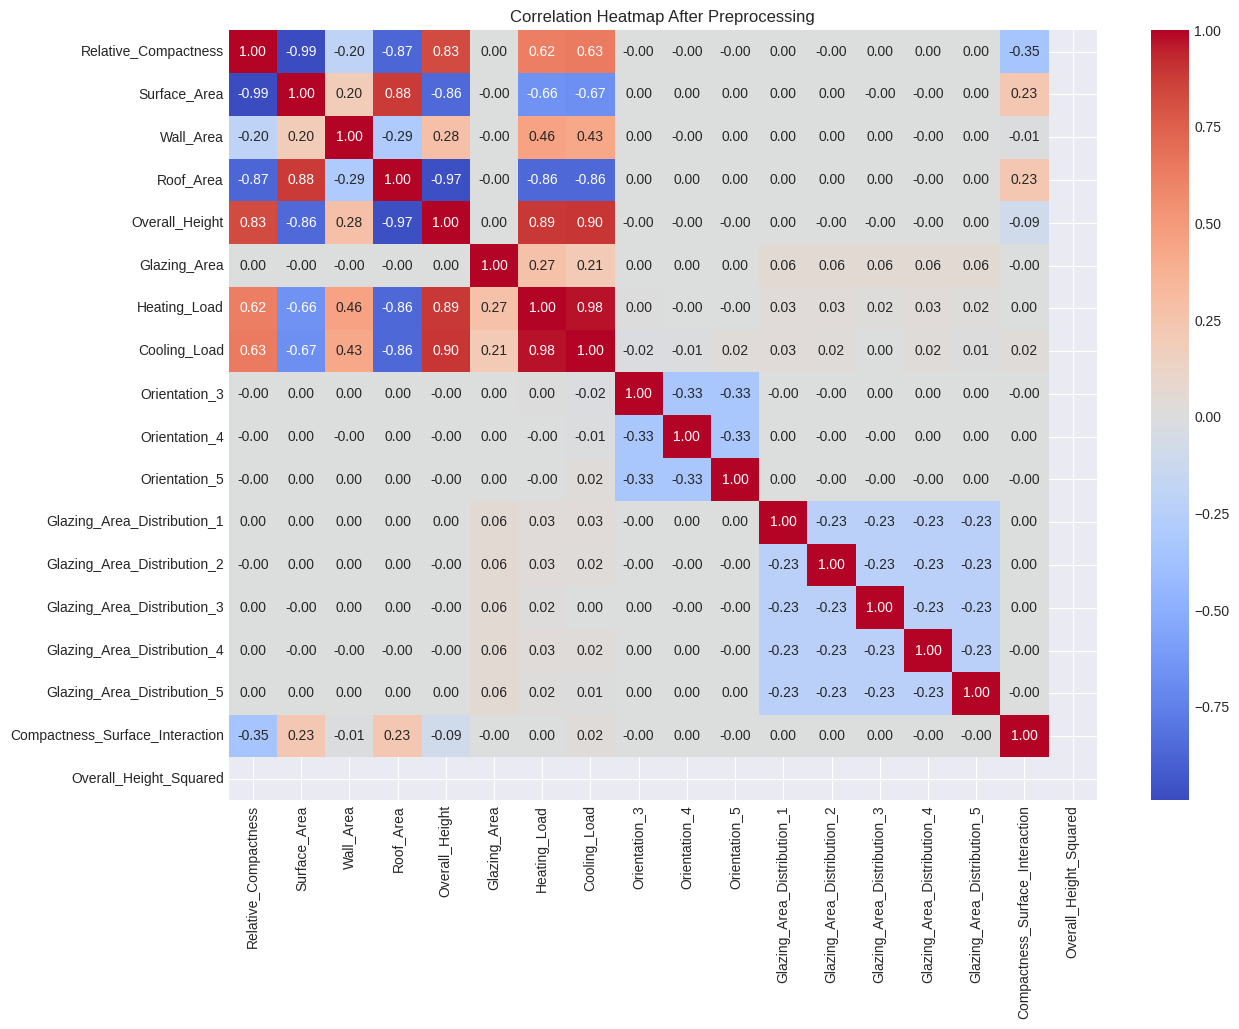

In [ ]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap After Preprocessing")
plt.show()
